In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('Iris.csv')
data.drop_duplicates(inplace = True)
data['species'] = data['species'].map({'Iris-versicolor':0, 'Iris-setosa':1, 'Iris-virginica':2})
# since we can only divide into two categories, we drop the third category
data = data[data['species'] != 2]

In [23]:
class LogisticRegression:
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
    def sigmoid(self, z):
        # >=0.5 -> category 0, <0.5 -> category 1
        return 1.0/(1.0+np.exp(-z))
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.w_ = np.zeros(1+X.shape[1])
        self.loss_ = []
        for i in range(self.times):
            z = np.dot(X, self.w_[1:])+self.w_[0]
            p = self.sigmoid(z)
            # J(w) = -sum(yi*log(sigmoid(zi))+(1-yi)*log(1-sigmoid(zi)))
            cost = -(np.sum(y*np.log(p) + (1-y)*np.log(1-p)))
            self.loss_.append(cost)
            # change w, wj = wj + alpha*sum(y-s(z)*xj)
            self.w_[0] += self.alpha * np.sum(y-p)
            self.w_[1:] += self.alpha * np.dot(X.T, y-p)
    def predict_prob(self, X):
        # predict testing data on probability
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z) # prob being category 1, 1-p is the prob being category 0
        p = p.reshape(-1,1)
        return np.concatenate([1-p, p], axis = 1)
    def predict(self, X):
        # predict testing data on category
        return np.argmax(self.predict_prob(X), axis = 1)

In [25]:
t0 = data[data['species']==0]
t1 = data[data['species']==1]
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)

train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1]], axis = 0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1]], axis = 0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1]], axis = 0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1]], axis = 0)

# since iris data have the same scale, we do not need standardize it
lr = LogisticRegression(0.01, 20)
lr.fit(train_X, train_y)
# lr.predict_prob(test_X)
result = lr.predict(test_X)
np.sum((result == test_y)/len(test_y))

1.0

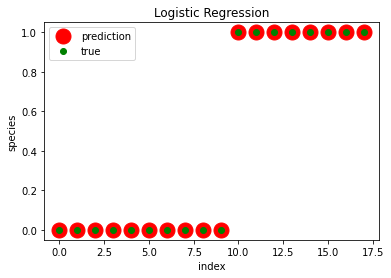

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(result, 'ro', ms=15, label='prediction') # ms -> marker size
plt.plot(test_y.values, 'go', label='true')
plt.title("Logistic Regression")
plt.xlabel('index')
plt.ylabel('species')
plt.legend()
plt.show()

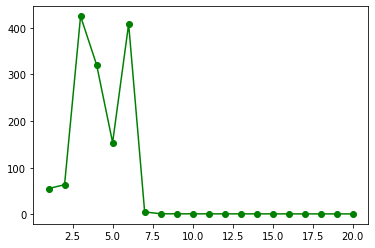

In [27]:
plt.plot(range(1,lr.times+1), lr.loss_, 'go-') # gradually reduce to 0